In [7]:
%reload_ext autoreload
%autoreload 2

# Library

In [8]:
from Analysis.inference import VdInference
import random
from datetime import datetime

# Inference class

In [ ]:
IF_FP16 = True
# on peut changer le ddim_steps pour avoir de meilleurs resultats. Nous avons preferé travailler en local, 10 steps était une durée résonnable avec des resultats correctes mais améliorables
vd_inference = VdInference(ddim_steps=10,which='v1.0', fp16=IF_FP16)



########
# v1.0 #
########


#######################
# Running in eps mode #
#######################

making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
Load pth from pretrained/kl-f8.pth
Load autoencoderkl with total 83653863 parameters,72921.759 parameter sum.
Load optimus_bert_connector with total 109489920 parameters,19028.842 parameter sum.
Load optimus_gpt2_connector with total 132109824 parameters,18949.784 parameter sum.
Load pth from pretrained/optimus-vae.pth
Load optimus_vae_next with total 241599744 parameters,-344611.688 parameter sum.
Load clip_image_context_encoder with total 427616513 parameters,64007.510 parameter sum.
Load clip_text_context_encoder with total 427616513 parameters,64007.510 parameter sum.
Load openai_unet_2d_next with total 859520964 parameters,100097.997 parameter sum.
Load openai_unet_0d_next with total 1706797888 parameters,249752.

## Inference text to image

Data shape for DDIM sampling is [1, 4, 64, 64], eta 0.0


DDIM Sampler: 100%|██████████| 10/10 [00:54<00:00,  5.47s/it]


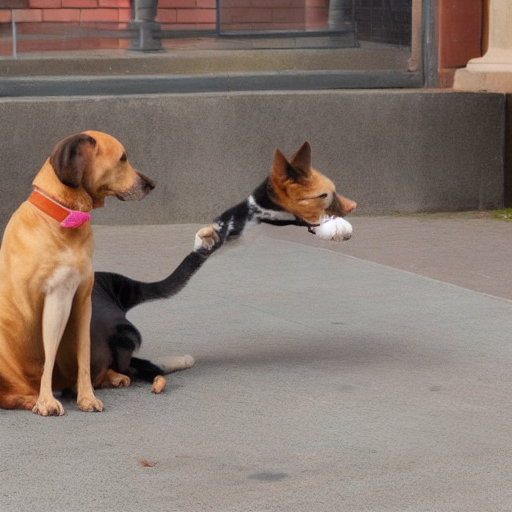

Image sauvegardée sous : ./output/t2i/CHIEN et un chat qui se battent_0_16_22_fp16_True.png


In [ ]:
text = "CHIEN et un chat qui se battent"
seed = random.randint(0, 2**32 - 1)

images = vd_inference.inference_t2i(text, seed)

current_time = datetime.now().strftime("%H_%M")

folder = "./output/t2i/"
for i, img in enumerate(images):
    display(img)  
    
    img_path = folder + f"{text}_{i}_{current_time}_fp16_{IF_FP16}.png"
    
    img.save(img_path)
    print(f"Image sauvegardée sous : {img_path}")

## Inference image to image

Data shape for DDIM sampling is [1, 4, 64, 64], eta 0.0


DDIM Sampler: 100%|██████████| 1/1 [00:05<00:00,  5.85s/it]


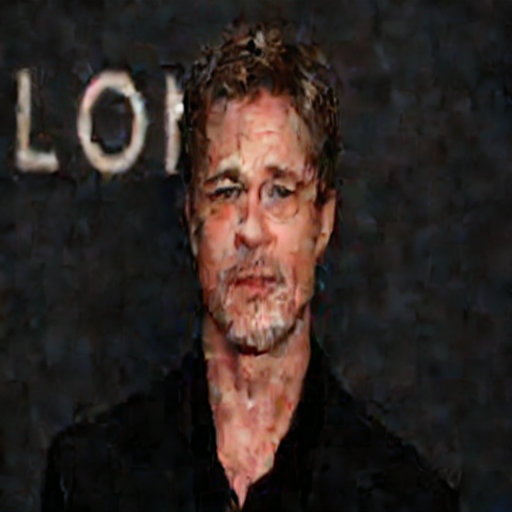

Image sauvegardée sous : ./output/i2i/input_image_variated_0.8_0.8_0_16_22_fp16_True.png


In [ ]:
img_path = "./input/input_image.jpeg"
image = Image.open(img_path)

fid_lvl = 0.8
fcs_lvl = 0.8
clr_adj = "Simple"
seed = random.randint(0, 2**32 - 1)


images = vd_inference.inference_i2i(image, fid_lvl, fcs_lvl, clr_adj, seed)

folder = "./output/i2i/"

for i, img in enumerate(images):
    display(img)  

    img_path = folder + f"input_image_variated_{fid_lvl}_{fcs_lvl}_{i}_{current_time}_fp16_{IF_FP16}.png"
    
    img.save(img_path)
    print(f"Image sauvegardée sous : {img_path}")


## Inference image to text

In [ ]:
img_path = "./input/input_image.jpeg"
image = Image.open(img_path)

seed = random.randint(0, 2**32 - 1)

current_time = datetime.now().strftime("%H_%M")

generated_text = vd_inference.inference_i2t(image, seed)

print("Texte généré à partir de l'image :")
print(generated_text)

folder = "./output/i2t/"

txt_path = folder + f"text_from_input_image_{current_time}_fp16_{IF_FP16}.txt"
with open(txt_path, "w", encoding="utf-8") as file:
    file.write(generated_text)

print(f"Texte sauvegardé sous : {txt_path}")

Data shape for DDIM sampling is [4, 768], eta 0.0


DDIM Sampler: 100%|██████████| 10/10 [00:08<00:00,  1.13it/s]


Texte généré à partir de l'image :
jimmy jane says funny haired mans mustache is funny game with he plans to conversing with mason on
cappuls men dressed like hat men tall men for gypsy men with hair did house show for celebrity customers
juliet star bows his best ever bride for the <PAD> tom son's surprise starring at the host later in the theater
david clair at the david clair star marquee perform for the upcoming star deer lovers at depressed star times in las vegas wa world at
Texte sauvegardé sous : ./output/i2t/text_from_input_image_16_22_fp16_True.txt


## Inference text to text

In [ ]:
text = "un chat orange tigré marche jusqu'a la salle de bain"
seed = random.randint(0, 2**32 - 1)

generated_text = vd_inference.inference_t2t(text, seed)

print("Texte généré à partir du prompt :")
print(generated_text)

current_time = datetime.now().strftime("%H_%M")

folder = "./output/t2t/"

txt_path = folder + f"text_from_text_{current_time}_fp16_{IF_FP16}.txt"
with open(txt_path, "w", encoding="utf-8") as file:
    file.write(generated_text)

print(f"Texte sauvegardé sous : {txt_path}")

Data shape for DDIM sampling is [4, 768], eta 0.0


DDIM Sampler: 100%|██████████| 10/10 [00:07<00:00,  1.28it/s]


Texte généré à partir du prompt :
gor said pepper orange the sum arch l ill ch army chandel orange chicken striped tiger the tiger striped the hen chanta bag two hen
oijing filkey orange planda chif orange silk lemon orange tiger
this oanda penguernicol orange lion cage lion orange sum be that sunglasses has san francimon te orange cat lead wild chan the yellow
it clown orange stressed as tigers monkey the orange emin dumphente the indian tiger sweeps tiger a brown leot tiger as cage monkeys
Texte sauvegardé sous : ./output/t2t/text_from_text_16_22_fp16_True.txt
